# 무주 반딧불 축제 EDA

## OD 데이터

In [14]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../../data/raw_data'
df = pd.DataFrame()
address = pd.read_csv("../../data/address_with_lon_lat_final.csv")
mooju = set(list(address[address['시군구명'] == '무주군']['행정동코드']))

# 전처리코드는 모두 여기에
def preprocess(df):
    # dest_hdong_cd 값이 축제가 열리는 곳인 무주군 데이터만 필터링
    #filtered_df = df[df['dest_hdong_cd'].isin(mooju)]

    filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    """#filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    df = pd.merge(df, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='dest_hdong_cd', right_on='행정동코드', how='left')

    # 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
    df = df.drop(columns=['행정동코드'])

    filtered_df = df[df['시군구명'] == '무주군']

    filtered_df = filtered_df.drop(columns=['시도명', '시군구명'])"""

    # 타 지역에서 온 데이터만 필터링
    #filtered_df = filtered_df[filtered_df['origin_hdong_cd'] != filtered_df['dest_hdong_cd']]
    #filtered_df = filtered_df[~filtered_df['origin_hdong_cd'].isin(mooju)]

    # 체류목적이 3(쇼핑여가), 4(기타), 5(여행) 인경우만 
    filtered_df = filtered_df[(filtered_df['dest_purpose'] == 3) | 
                          (filtered_df['dest_purpose'] == 4) | 
                          (filtered_df['dest_purpose'] == 5)]
    #filtered_df = filtered_df[(filtered_df['dest_purpose'] == 5)]
    return filtered_df

# 'od'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('od'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # 전처리
                filtered_data = preprocess(csv_data)

                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 기존데이터프레임에 포함합니다.")
                df = pd.concat([df, globals()[f'df_{mmdd_str}']])

데이터프레임 df_0901가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0902가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0903가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0904가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0905가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0906가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0907가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0908가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0909가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0910가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0911가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0912가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0913가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0914가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0915가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0916가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0917가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0918가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0919가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0920가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0921가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0922가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0923가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0924가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0925가 생성되었고, 기존데이터프레임에 포함합니다.


In [15]:
df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
152806,4155025000,4573025000,20230901,13:00,16:00,1,0,0.0,5.0,5,339914,130,14
216339,3020055000,4573025000,20230901,17:00,19:00,0,4,0.0,1.0,4,153417,69,7
302699,3023058000,4573025000,20230901,17:00,19:00,0,0,0.0,0.0,5,84260,116,12
382792,4573032000,4573025000,20230901,12:00,13:00,1,2,0.0,5.0,5,86387,64,5
409031,3017063000,4573025000,20230901,21:00,23:00,0,3,0.0,4.0,5,113515,107,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669490,4573033000,4573025000,20231015,17:00,17:00,0,3,0.0,1.0,4,30885,23,6
2687397,3017056000,4573025000,20231015,17:00,18:00,0,0,0.0,3.0,4,106470,61,12
2932013,4573032000,4573025000,20231015,12:00,12:00,0,0,0.0,5.0,5,24822,17,12
3142542,3020052000,4573025000,20231015,10:00,11:00,1,3,0.0,0.0,3,73233,66,6


In [16]:
"""
축제기간과 축제기간이 아닌 날의 데이터를 구분지어 불러오기
축제기간: 23.09.02~23.09.10
비축제기간: 23.09.11~23.10.15
"""
festival_df = df[(df['date'] >= 20230902) & (df['date'] <= 20230910)]
non_festival_df = df[(df['date'] >= 20230916) & (df['date'] <= 20230924)]

In [4]:
festival_df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
1096,4311374100,4573031000,20230902,09:00,11:00,1,0,0.0,0.0,5,163782,109,6
2845,4511364100,4573025000,20230902,11:00,13:00,0,4,0.0,0.0,3,185125,140,7
3874,4812965000,4573034000,20230902,16:00,18:00,0,4,0.0,4.0,5,424072,131,7
4218,4817073000,4573032000,20230902,13:00,16:00,1,0,0.0,0.0,5,119100,141,9
4998,4311258000,4573025000,20230902,17:00,18:00,0,0,0.0,2.0,4,86425,100,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229495,4719051000,4573033000,20230910,08:00,11:00,0,3,0.0,0.0,5,309896,154,6
3237279,4574036000,4573034000,20230910,12:00,12:00,0,1,1.0,5.0,5,38926,27,5
3239981,4572025000,4573033000,20230910,18:00,18:00,0,3,0.0,5.0,5,50623,33,6
3246695,4572032000,4573034000,20230910,17:00,17:00,0,1,1.0,4.0,4,33474,22,5


In [5]:
festival_df['od_cnts'].unique()

array([  6,   7,   9,  12,  14,  28,   8,  40,  32,  50,  11,  80,   5,
        42,  23,  13,  17,  19,  41,  46,  15,  21, 100,  10,  20],
      dtype=int64)

In [6]:
festival_df[festival_df['od_cnts'] == 100]

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
3059393,2826074000,4573034000,20230908,17:00,22:00,0,0,0.0,0.0,5,615825,274,100


In [7]:
address[address['행정동코드'] == 2826074000]

,행정동코드,시도명,시군구명,읍면동명,동리명,위도,경도
1891,2826074000,인천광역시,서구,아라동,원당동,37.596114,126.705112
1892,2826074000,인천광역시,서구,아라동,당하동,37.590735,126.676215


In [10]:
# 날짜별 od_cnts 합산 (축제 기간과 비축제 기간)
festival_df_grouped = festival_df.groupby('date')['od_cnts'].sum().reset_index()
non_festival_df_grouped = non_festival_df.groupby('date')['od_cnts'].sum().reset_index()


In [15]:
festival_df_grouped

# 0, 7 번째 평균과 1, 8 번째 평균 구하기
avg_0_7 = festival_df_grouped.loc[[0, 7], 'od_cnts'].mean()  # 0, 7번째 od_cnts 평균
avg_1_8 = festival_df_grouped.loc[[1, 8], 'od_cnts'].mean()  # 1, 8번째 od_cnts 평균

# 새로운 데이터 생성 (요일: [토, 일, 월, 화, 수, 목, 금])
new_od_cnts = [avg_0_7, avg_1_8] + festival_df_grouped.loc[2:6, 'od_cnts'].tolist()

# 새로운 데이터프레임 생성
new_df = pd.DataFrame({
    '요일': ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
    'od_cnts': new_od_cnts
})

# 결과 출력
print(new_df)


    요일  od_cnts
0  Sat   9080.5
1  Sun   3490.0
2  Mon   1034.0
3  Tue   1054.0
4  Wed    948.0
5  Thu    880.0
6  Fri   2897.0


/var/folders/tr/80__cnw5397709rycd9nw0d40000gn/T/ipykernel_62925/3960267655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='요일', y='od_cnts', data=new_df, palette='YlGn_r')  # YlGn 팔레트 반전 사용
/var/folders/tr/80__cnw5397709rycd9nw0d40000gn/T/ipykernel_62925/3960267655.py:21: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  plt.tight_layout()
/var/folders/tr/80__cnw5397709rycd9nw0d40000gn/T/ipykernel_62925/3960267655.py:21: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
/Users/hwangchanwoong/miniforge3/envs/ML/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hwangchanwoong/miniforge3/envs/ML/lib/python3.9/site-pack

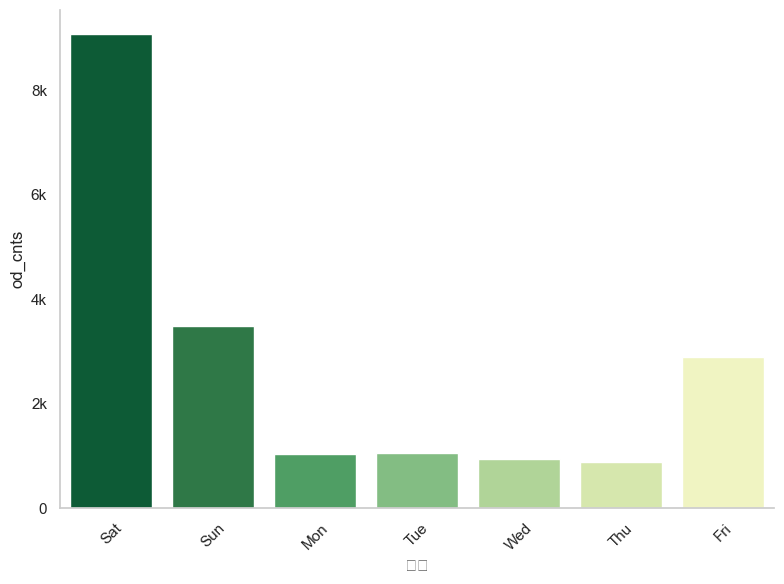

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import ticker

# 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='요일', y='od_cnts', data=new_df, palette='YlGn_r')  # YlGn 팔레트 반전 사용

# 배경선 제거
ax.grid(False)

# x축과 y축만 남기고 나머지 사각형 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# y축을 1000 단위로 k 형식으로 변환, 0일 때는 0으로 표시
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else '{:,.0f}k'.format(x/1000)))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # 이 부분을 주석 처리하거나 제거하면 그래프가 출력되지 않음


In [54]:
festival_df_grouped2 = festival_df.groupby('end_time')['od_cnts'].sum().reset_index()
festival_df_grouped2

,end_time,od_cnts
0,08:00,73
1,09:00,418
2,10:00,1198
3,11:00,2587
4,12:00,3044
5,13:00,3558
6,14:00,3351
7,15:00,4088
8,16:00,3665
9,17:00,3158


In [63]:
data = {'요일': ['8-10', '11-13', '14-16', '17-19', '20-23'],
        'od_cnts': [festival_df_grouped2[0:3]['od_cnts'].sum(),
                    festival_df_grouped2[3:6]['od_cnts'].sum(),
                    festival_df_grouped2[6:9]['od_cnts'].sum(),
                    festival_df_grouped2[9:12]['od_cnts'].sum(),
                    festival_df_grouped2[12:]['od_cnts'].sum()]}

festival_df_grouped3 = pd.DataFrame(data)

In [64]:
festival_df_grouped3

,요일,od_cnts
0,8-10,1689
1,11-13,9189
2,14-16,11104
3,17-19,7782
4,20-23,2190


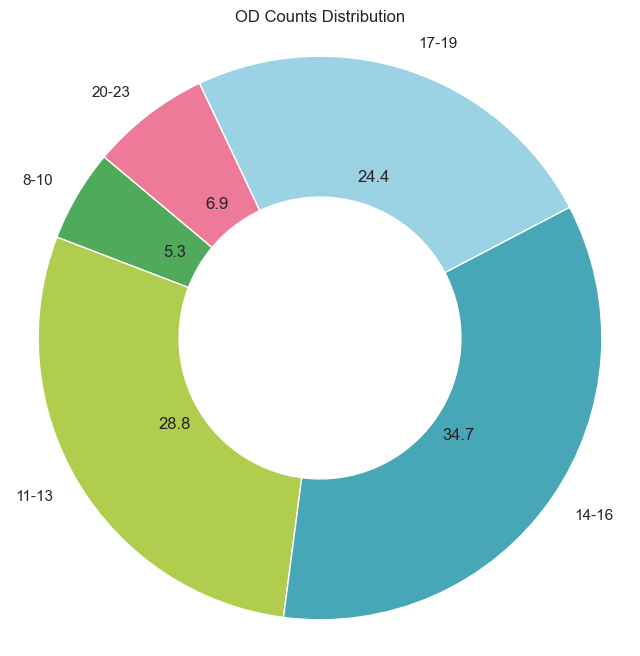

In [75]:
import matplotlib.pyplot as plt

# 데이터
labels = ['8-10', '11-13', '14-16', '17-19', '20-23']
od_cnts = [1689, 9189, 11104, 7782, 2190]
colors = ['#50aa5c', '#B1CD4D', '#48A7B6', '#9BD3E4', '#EC7A98']

# 파이 차트 생성 (도넛 형태)
plt.figure(figsize=(8, 8))
plt.pie(od_cnts, labels=labels, colors=colors, startangle=140,
        autopct=lambda p: '{:.1f}'.format(p) if p > 0 else '', wedgeprops=dict(width=0.5))
plt.axis('equal')  # 동그랗게 보이도록 설정
plt.title('OD Counts Distribution')
plt.show()


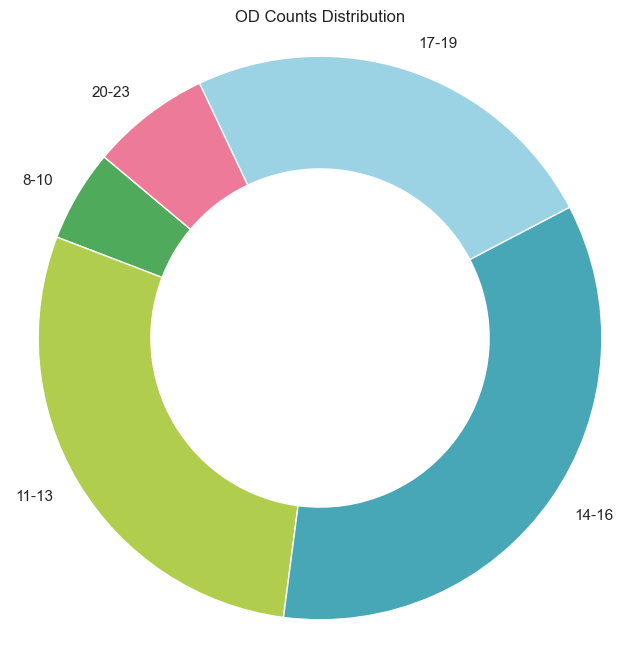

In [74]:
import matplotlib.pyplot as plt

# 데이터
labels = ['8-10', '11-13', '14-16', '17-19', '20-23']
od_cnts = [1689, 9189, 11104, 7782, 2190]
colors = ['#50aa5c', '#B1CD4D', '#48A7B6', '#9BD3E4', '#EC7A98']

# 파이 차트 생성 (도넛 형태)
plt.figure(figsize=(8, 8))
plt.pie(od_cnts, labels=labels, colors=colors, startangle=140, wedgeprops=dict(width=0.4)) 
        #autopct=lambda p: '{:.1f}'.format(p) if p > 0 else '', wedgeprops=dict(width=0.5))
plt.axis('equal')  # 동그랗게 보이도록 설정
plt.title('OD Counts Distribution')
plt.show()


In [17]:
festival_df_grouped2 = festival_df[['date', 'end_time', 'age', 'od_cnts']]
festival_df_grouped2.loc[festival_df_grouped2['date'] == 20230909, 'date'] = 20230902
festival_df_grouped2.loc[festival_df_grouped2['date'] == 20230910, 'date'] = 20230903
festival_df_grouped2

,date,end_time,age,od_cnts
2269,20230902,20:00,3,9
2845,20230902,13:00,4,7
4773,20230902,19:00,4,9
4998,20230902,18:00,0,12
5519,20230902,17:00,0,12
...,...,...,...,...
3095262,20230903,11:00,2,5
3159991,20230903,13:00,4,5
3170004,20230903,10:00,4,5
3199215,20230903,10:00,2,5


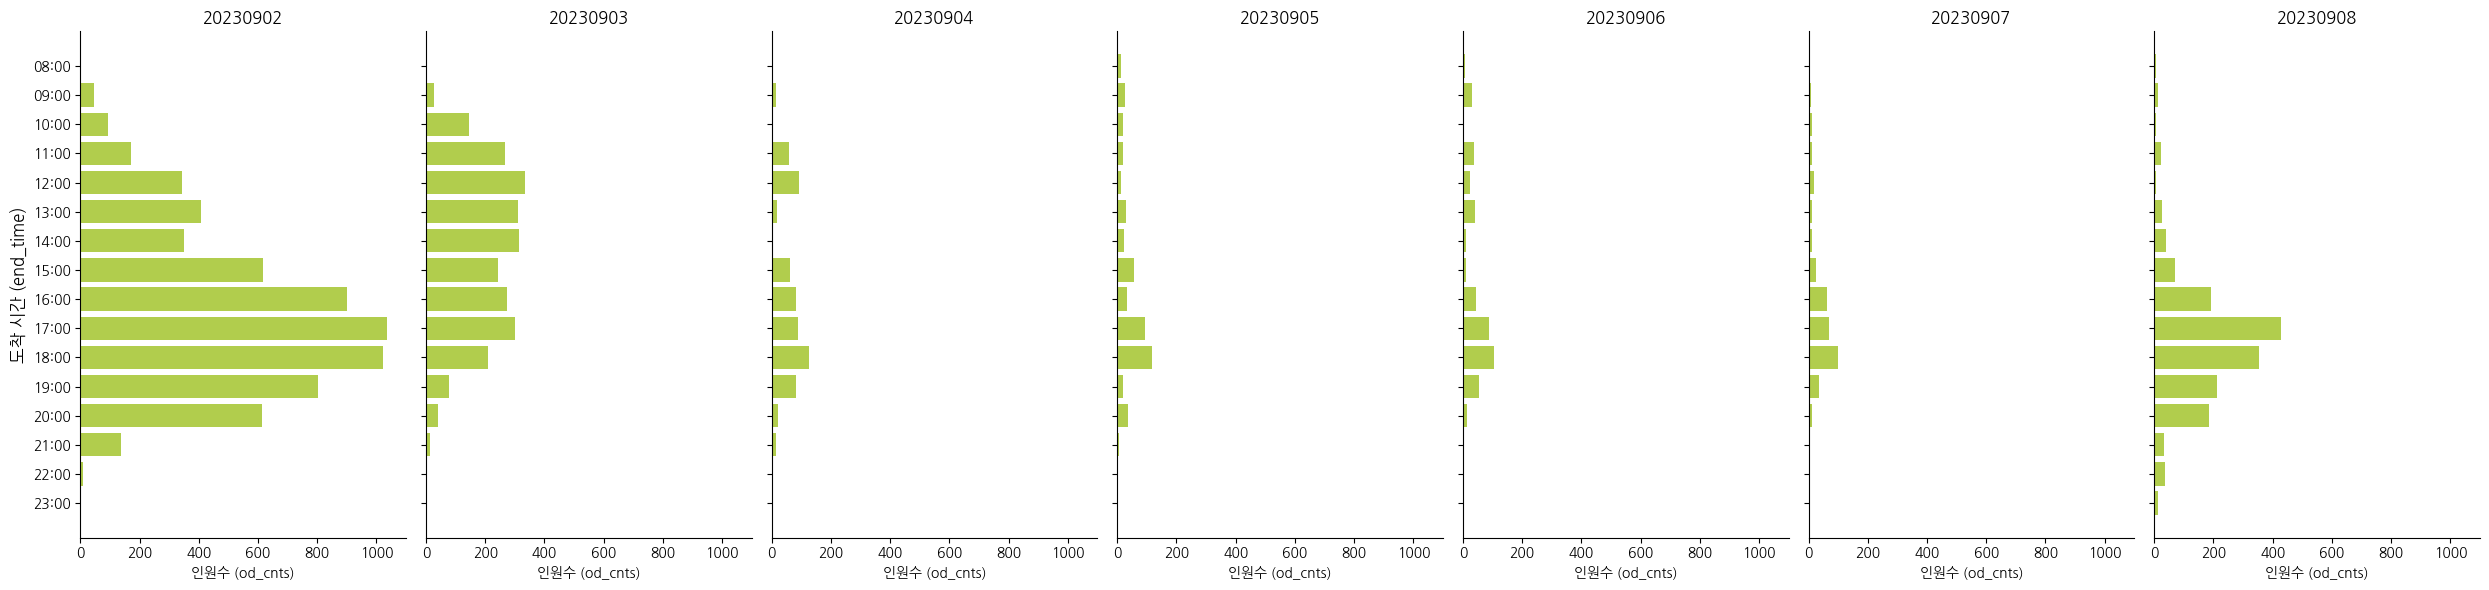

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정 (NanumGothic)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터를 처리하고 날짜별로 각각의 그래프를 그리는 함수
def process_and_plot(festival_df_grouped2):
    # 서브플롯 생성 (1행 7열)
    fig, axs = plt.subplots(1, 7, figsize=(25, 6), sharey=True)

    for i, date in enumerate(range(20230902, 20230909)):  # 9월 2일부터 8일까지
        # 해당 날짜의 데이터만 선택
        df_date = festival_df_grouped2[festival_df_grouped2['date'] == date]

        # end_time을 기준으로 그룹화하고 od_cnts 합계 계산
        df_date = df_date.groupby('end_time')['od_cnts'].sum().reset_index()

        # od_cnts 값 모두를 2로 나눔
        if date == 20230902 or date == 20230903:
            df_date['od_cnts'] = df_date['od_cnts'] // 2

        # 도착시간을 08:00부터 23:00까지 모두 포함한 데이터프레임으로 변경
        all_times = pd.date_range("08:00", "23:00", freq="H").strftime('%H:%M')
        df_full = pd.DataFrame({'end_time': all_times})
        df_full = pd.merge(df_full, df_date, on='end_time', how='left')
        df_full['od_cnts'] = df_full['od_cnts'].fillna(0)  # 데이터가 없는 시간대는 0으로 채움

        # 서브플롯에 히스토그램 그리기
        axs[i].barh(df_full['end_time'], df_full['od_cnts'], color='#B1CD4D')
        axs[i].set_title(f'{date}', fontsize=12)
        axs[i].set_xlabel('인원수 (od_cnts)', fontsize=10)

        # x축 범위 설정
        axs[i].set_xlim(0, 1100)

        # y축 역순으로 출력
        axs[i].invert_yaxis()

        # 테두리 제거
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)

    # y축 레이블 설정
    axs[0].set_ylabel('도착 시간 (end_time)', fontsize=12)

    # 그래프 레이아웃 조정
    plt.tight_layout()
    plt.show()

# 함수 호출
process_and_plot(festival_df_grouped2)


In [93]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../../data/raw_data'
df = pd.DataFrame()
address = pd.read_csv("../../data/address_with_lon_lat_final.csv")
mooju = set(list(address[address['시군구명'] == '무주군']['행정동코드']))

# 전처리코드는 모두 여기에
def preprocess(df):
    # origin_hdong_cd 값이 축제가 열리는 곳인 무주군 데이터만 필터링
    filtered_df = df[df['origin_hdong_cd'].isin(mooju)]

    #filtered_df = df[df['origin_hdong_cd'] == 4573025000]
    """#filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    df = pd.merge(df, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='dest_hdong_cd', right_on='행정동코드', how='left')

    # 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
    df = df.drop(columns=['행정동코드'])

    filtered_df = df[df['시군구명'] == '무주군']

    filtered_df = filtered_df.drop(columns=['시도명', '시군구명'])"""

    # 타 지역에서 온 데이터만 필터링
    #filtered_df = filtered_df[filtered_df['origin_hdong_cd'] != filtered_df['dest_hdong_cd']]
    #filtered_df = filtered_df[~filtered_df['origin_hdong_cd'].isin(mooju)]

    # 체류목적이 3(쇼핑여가), 4(기타), 5(여행) 인경우만 
    filtered_df = filtered_df[(filtered_df['dest_purpose'] == 0)]

    return filtered_df

# 'od'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('od'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # 전처리
                filtered_data = preprocess(csv_data)

                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 기존데이터프레임에 포함합니다.")
                df = pd.concat([df, globals()[f'df_{mmdd_str}']])

데이터프레임 df_0901가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0902가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0903가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0904가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0905가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0906가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0907가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0908가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0909가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0910가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0911가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0912가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0913가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0914가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0915가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0916가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0917가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0918가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0919가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0920가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0921가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0922가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0923가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0924가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0925가 생성되었고, 기존데이터프레임에 포함합니다.


In [94]:
"""
축제기간과 축제기간이 아닌 날의 데이터를 구분지어 불러오기
축제기간: 23.09.02~23.09.10
비축제기간: 23.09.11~23.10.15
"""
festival_df = df[(df['date'] >= 20230902) & (df['date'] <= 20230910)]
non_festival_df = df[(df['date'] >= 20230916) & (df['date'] <= 20230924)]

In [95]:
festival_df_grouped2 = festival_df[['date', 'start_time', 'age', 'od_cnts']]
festival_df_grouped2.loc[festival_df_grouped2['date'] == 20230909, 'date'] = 20230902
festival_df_grouped2.loc[festival_df_grouped2['date'] == 20230910, 'date'] = 20230903
festival_df_grouped2

,date,start_time,age,od_cnts
8640,20230902,21:00,3,14
9437,20230902,21:00,0,12
20131,20230902,21:00,4,10
24872,20230902,21:00,1,7
30113,20230902,22:00,0,20
...,...,...,...,...
3224667,20230903,14:00,5,5
3225826,20230903,09:00,1,5
3237365,20230903,19:00,3,5
3237570,20230903,21:00,1,5


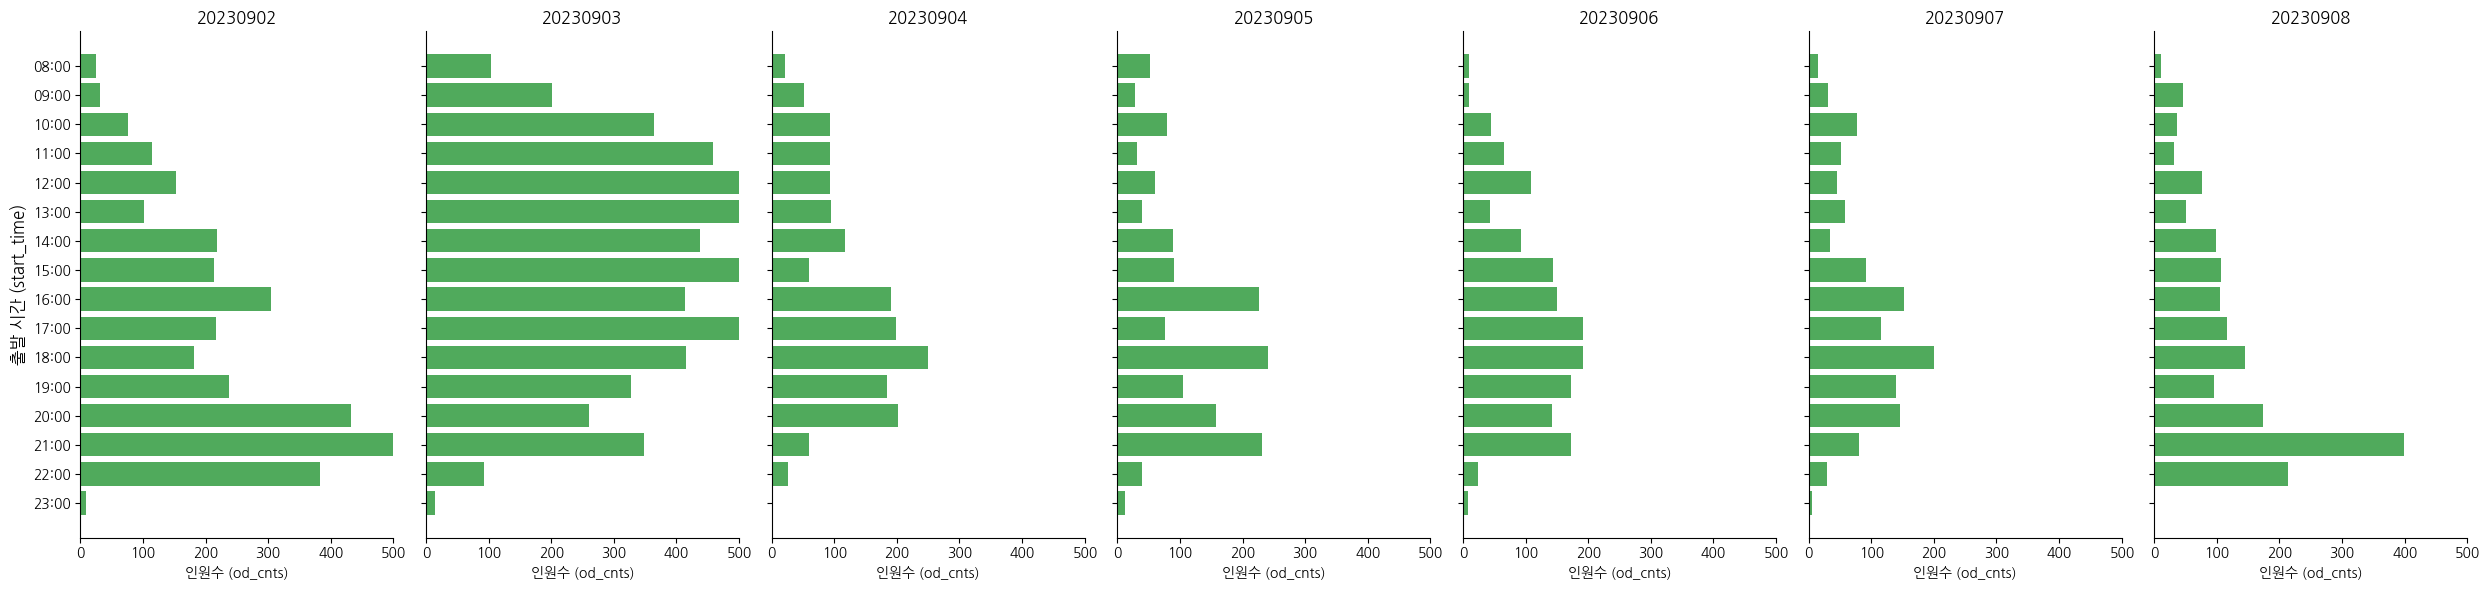

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정 (NanumGothic)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터를 처리하고 날짜별로 각각의 그래프를 그리는 함수
def process_and_plot(festival_df_grouped2):
    # 서브플롯 생성 (1행 7열)
    fig, axs = plt.subplots(1, 7, figsize=(25, 6), sharey=True)

    for i, date in enumerate(range(20230902, 20230909)):  # 9월 2일부터 8일까지
        # 해당 날짜의 데이터만 선택
        df_date = festival_df_grouped2[festival_df_grouped2['date'] == date]

        # end_time을 기준으로 그룹화하고 od_cnts 합계 계산
        df_date = df_date.groupby('start_time')['od_cnts'].sum().reset_index()

        # od_cnts 값 모두를 2로 나눔
        if date == 20230902 or date == 20230903:
            df_date['od_cnts'] = df_date['od_cnts'] // 2

        # 도착시간을 08:00부터 23:00까지 모두 포함한 데이터프레임으로 변경
        all_times = pd.date_range("08:00", "23:00", freq="H").strftime('%H:%M')
        df_full = pd.DataFrame({'start_time': all_times})
        df_full = pd.merge(df_full, df_date, on='start_time', how='left')
        df_full['od_cnts'] = df_full['od_cnts'].fillna(0)  # 데이터가 없는 시간대는 0으로 채움

        # 서브플롯에 히스토그램 그리기
        axs[i].barh(df_full['start_time'], df_full['od_cnts'], color='#50aa5c')
        axs[i].set_title(f'{date}', fontsize=12)
        axs[i].set_xlabel('인원수 (od_cnts)', fontsize=10)

        # x축 범위 설정
        axs[i].set_xlim(0, 500)

        # y축 역순으로 출력
        axs[i].invert_yaxis()

        # 테두리 제거
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)

    # y축 레이블 설정
    axs[0].set_ylabel('출발 시간 (start_time)', fontsize=12)

    # 그래프 레이아웃 조정
    plt.tight_layout()
    plt.show()

# 함수 호출
process_and_plot(festival_df_grouped2)
